Import packages

In [28]:
import numpy as np
import pandas as pd 
import requests
import json
import io
import lxml
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import random
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import seaborn as sns

Load scraped data

In [3]:
df = pd.read_csv('macrotrends data/consolidated_s_p_500_table.csv')
df = df.drop(["Unnamed: 0"], axis = 'columns')
df = df.sort_values(["Date", "Ticker"])
df

,Date,Ticker,Company,TTM_NetIncome,Shareholders_Equity,Return_on_Equity,Total_Assets,Return_On_Assets,LT_Investments_Debt,Return_on_Investment,Shares_Outstanding,TTM_Revenue,TTM_Gross_Profit,Gross_Margin,Net_Margin
17233,2009-10-31,A,agilent-technologies,-3.000000e+07,2.510000e+09,-0.0124,7.610000e+09,-0.0044,5.420000e+09,0.0097,346000000.0,4.480000e+09,2.290000e+09,0.5115,-0.0069
23099,2009-10-31,ADI,analog-devices,2.500000e+08,2.530000e+09,0.1011,3.370000e+09,0.0797,2.910000e+09,0.1985,293000000.0,2.020000e+09,1.120000e+09,0.5551,0.1230
6293,2009-10-31,ADSK,autodesk,-1.000000e+08,1.430000e+09,-0.0704,2.320000e+09,-0.0412,NaN,inf,233000000.0,1.750000e+09,1.550000e+09,0.8879,-0.0549
20929,2009-10-31,AVGO,broadcom,-4.000000e+07,1.040000e+09,-0.0979,1.970000e+09,-0.0470,1.270000e+09,0.0702,219000000.0,1.480000e+09,5.600000e+08,0.3774,-0.0296
21605,2009-10-31,BBWI,bath-body-works,1.100000e+08,1.870000e+09,0.0579,6.940000e+09,0.0156,4.750000e+09,0.0898,328000000.0,8.560000e+09,2.800000e+09,0.3275,0.0126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,2022-03-31,YUM,yum!-brands,1.650000e+09,-8.490000e+09,-0.2021,5.820000e+09,0.2764,2.840000e+09,0.7422,294000000.0,6.650000e+09,4.910000e+09,0.7389,0.2480
4315,2022-03-31,ZBH,zimmer-biomet-holdings,2.200000e+08,1.202000e+10,0.0174,2.162000e+10,0.0093,1.731000e+10,0.0385,210000000.0,7.650000e+09,5.330000e+09,0.6962,0.0285
22412,2022-03-31,ZBRA,zebra-technologies,8.100000e+08,2.910000e+09,0.2883,6.130000e+09,0.1368,3.820000e+09,0.2448,53000000.0,5.710000e+09,2.610000e+09,0.4569,0.1425
20442,2022-03-31,ZION,"zions-bancorporation,-na",9.800000e+08,6.290000e+09,0.1327,9.113000e+10,0.0109,6.980000e+09,0.1496,152000000.0,2.940000e+09,2.880000e+09,0.9819,0.3341


Calculate `% change` of shares outstanding. This `% change` is from start of data to the latest data point.

e.g. If the company had 100 million shares outstanding in 2009 and have 50 million shares outstanding now, the `% change` would be -50%

In [18]:
updated_so_df = pd.DataFrame()
for i in df["Ticker"].unique():
    subset_df = df[df["Ticker"] == i]
    subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] - 
                                        subset_df.iloc[0].loc["Shares_Outstanding"]) * 100 / subset_df.iloc[0].loc["Shares_Outstanding"]
    updated_so_df = pd.concat([updated_so_df, subset_df])

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["S.O. Percent Change"] = (subset_df.iloc[-1].loc["Shares_Outstanding"] -
C:\Users\samit\AppData\Local\Temp\ipykernel_6996\315811975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

#### UBER CANNIBALS

In [40]:
uber_cannibals = updated_so_df.groupby("Ticker").mean().sort_values(by = ["S.O. Percent Change"],
                                                            ascending = [True])
uber_cannibals

,TTM_NetIncome,Shareholders_Equity,Return_on_Equity,Total_Assets,Return_On_Assets,LT_Investments_Debt,Return_on_Investment,Shares_Outstanding,TTM_Revenue,TTM_Gross_Profit,Gross_Margin,Net_Margin,S.O. Percent Change
Ticker,,,,,,,,,,,,,
CHTR,2.695400e+09,1.889420e+10,-0.763612,8.035320e+10,0.070472,6.225820e+10,0.047446,1.761400e+08,2.449500e+10,9.264000e+09,0.401990,0.169294,-80.957563
AZO,1.251200e+09,-1.507000e+09,-0.941038,8.837600e+09,0.145586,2.903600e+09,0.682866,3.272000e+07,1.032340e+10,5.412400e+09,0.522606,0.118302,-58.823529
STX,1.379800e+09,2.158000e+09,0.747122,8.978800e+09,0.153120,5.927400e+09,0.268506,3.389800e+08,1.195700e+10,3.276600e+09,0.272332,0.112396,-57.307692
TRV,2.919167e+09,2.520875e+10,0.115333,1.064662e+11,0.027458,3.177042e+10,0.130552,3.362500e+08,2.807812e+10,1.226750e+10,0.438973,0.104915,-57.117750
HPQ,3.531800e+09,1.525420e+10,-0.696484,7.274420e+10,0.067762,2.679100e+10,0.646136,1.793680e+09,8.076880e+10,1.750640e+10,0.202992,0.057550,-55.108740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENPH,1.347826e+07,1.236957e+08,1.810046,4.819565e+08,-0.185754,3.115385e+08,NaN,7.404444e+07,4.234783e+08,1.423913e+08,0.281715,-0.064335,NaN
FB,1.207174e+10,6.165767e+10,0.276839,7.003304e+10,0.219072,2.429789e+10,NaN,2.670578e+09,3.739739e+10,3.069761e+10,0.807652,0.264261,NaN
GNRC,1.806000e+08,7.038000e+08,0.222492,2.134600e+09,0.078708,1.608600e+09,0.175696,6.402000e+07,1.623800e+09,5.950000e+08,0.369236,0.090626,NaN


In [45]:
sorted_by_roe = uber_cannibals.loc[:,["Return_on_Equity", "Return_On_Assets", "Return_on_Investment", "S.O. Percent Change"]].sort_values(by = ["Return_on_Equity"], ascending = [False])
sorted_by_roe.head(25)

,Return_on_Equity,Return_On_Assets,Return_on_Investment,S.O. Percent Change
Ticker,,,,
ORLY,44.993440,0.127824,0.407818,-51.449275
IDXX,30.419550,0.191220,0.548650,-28.925620
KMB,24.729692,0.109016,0.332318,-18.944844
CL,11.598932,0.172650,0.530116,-19.542421
WYNN,10.936076,0.026320,0.089553,-5.000000
MAS,8.956692,0.061382,0.229076,-31.339031
BA,5.737484,0.036770,0.375878,-17.110799
LOW,5.478288,0.081630,0.242484,-52.416610
IT,3.786340,0.072772,0.413114,-15.306122


<AxesSubplot:ylabel='Ticker'>

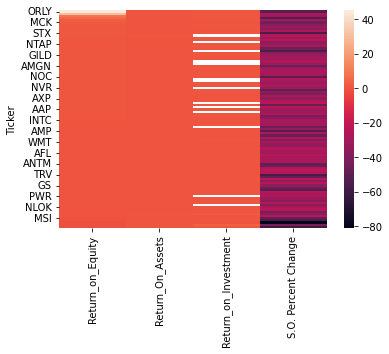

In [38]:
sns.heatmap(sorted_by_roe)

In [ ]:
grouped_so_df.index[0:100]

In [ ]:
updated_so_df[(updated_so_df["Ticker"].isin(grouped_so_df.index[0:100])) & 
              (updated_so_df["Return_on_Equity"] > 0.3) & 
              (updated_so_df["Net_Margin"] > 0.3)]["Ticker"].unique()

In [ ]:
agg_metrics = ["TTM_NetIncome", 
               "Total_Assets", 
               "Shareholders_Equity", 
               "LT_Investments_Debt", 
               "Shares_Outstanding", 
               "TTM_Revenue",
               "TTM_Gross_Profit"]

ratio_metrics = ["Return_on_Equity", 
                "Return_on_Investment",
                "Gross_Margin",
                "Net_Margin"]

fig = make_subplots(rows=4, cols=2, subplot_titles=agg_metrics)
row = 1
for index, value in enumerate(agg_metrics):
    if index % 2 == 0:
        fig.add_trace(
            go.Bar(x=consolidated_table["Date"], y=consolidated_table[value]),
            row=row, col=1)
    else:
        fig.add_trace(
            go.Bar(x=consolidated_table["Date"], y=consolidated_table[value]),
            row=row, col=2)
        row+=1
    
fig.update_layout(height=1200, width=800, title_text=f"Aggregate metrics for {comp_name.upper()}", showlegend=False)
fig.show()

fig2 = make_subplots(rows=2, cols=2, subplot_titles=ratio_metrics)
row = 1
for index, value in enumerate(ratio_metrics):
    if index % 2 == 0:
        fig2.add_trace(
            go.Bar(x=consolidated_table["Date"], y=consolidated_table[value]),
            row=row, col=1)
    else:
        fig2.add_trace(
            go.Bar(x=consolidated_table["Date"], y=consolidated_table[value]),
            row=row, col=2)
        row+=1
    
fig2.update_layout(height=1200, width=800, title_text=f"Ratio metrics for {comp_name.upper()}", showlegend=False)
fig2.show()